# Load Cleaned Data (with Sentiment & Themes)

In [1]:
import pandas as pd

df = pd.read_csv('../outputs/sentiment_results.csv')
df.head()


,review,rating,date,bank,source,sentiment,sentiment_score
0,"""Why don’t your ATMs support account-to-accoun...",4,2025-06-06,Commercial Bank of Ethiopia,Google Play,NEGATIVE,0.996465
1,what is this app problem???,1,2025-06-05,Commercial Bank of Ethiopia,Google Play,NEGATIVE,0.999623
2,the app is proactive and a good connections.,5,2025-06-05,Commercial Bank of Ethiopia,Google Play,POSITIVE,0.999868
3,I cannot send to cbebirr app. through this app.,3,2025-06-05,Commercial Bank of Ethiopia,Google Play,NEGATIVE,0.995335
4,good,4,2025-06-05,Commercial Bank of Ethiopia,Google Play,POSITIVE,0.999816


# Visualize Sentiment by Bank

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached matplotlib-3.10.3-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.2.1-cp313-cp313-win_amd64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached matplotlib-3.10.3-cp313-cp313-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.2-cp313-cp313-win_amd64.whl (223 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.2 MB ? eta 

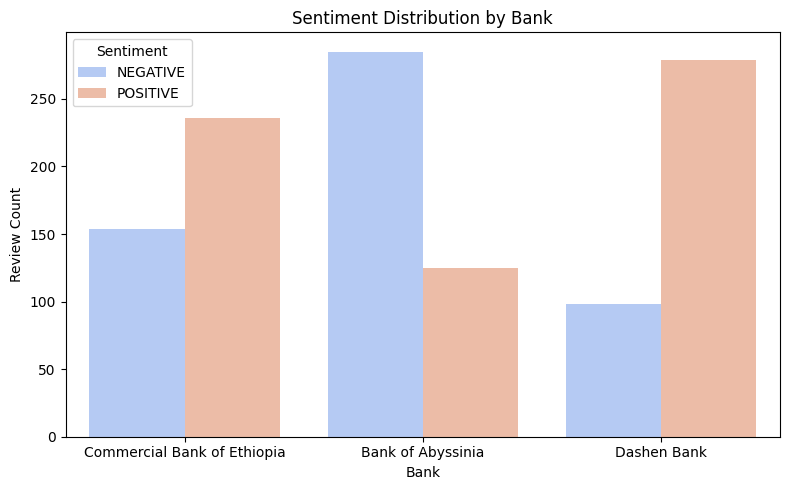

In [ ]:
#Bar Plot — Sentiment Distribution

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='bank', hue='sentiment', palette='coolwarm')
plt.title('Sentiment Distribution by Bank')
plt.xlabel('Bank')
plt.ylabel('Review Count')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.savefig('../outputs/plots/sentiment_by_bank.png')

# Visualize Rating Distribution

C:\Users\addis\AppData\Local\Temp\ipykernel_9596\3299740996.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='bank', y='rating', palette='Set2')


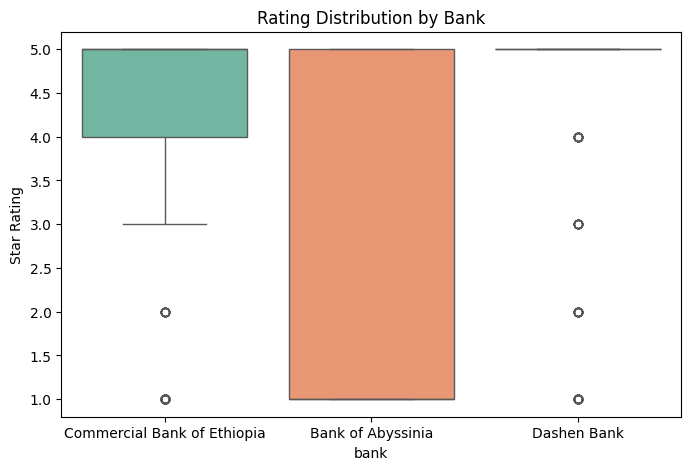

In [4]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='bank', y='rating', palette='Set2')
plt.title('Rating Distribution by Bank')
plt.ylabel('Star Rating')
plt.savefig('../outputs/plots/rating_distribution.png')


# Keyword Cloud by Bank

  Using cached wordcloud-1.9.4-cp313-cp313-win_amd64.whl.metadata (3.5 kB)
Using cached wordcloud-1.9.4-cp313-cp313-win_amd64.whl (300 kB)


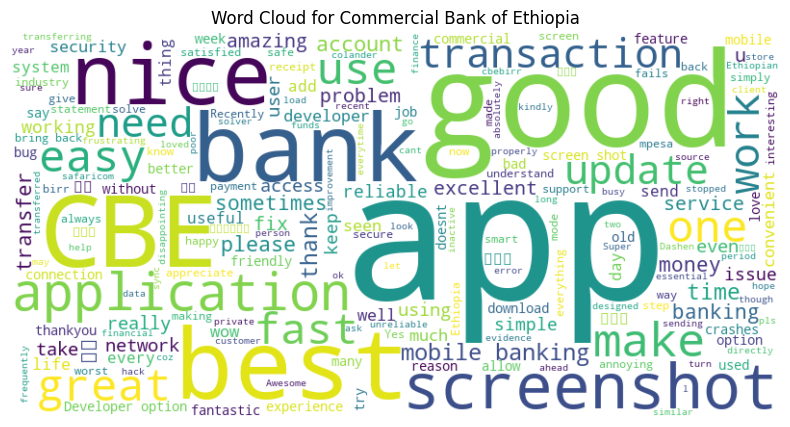

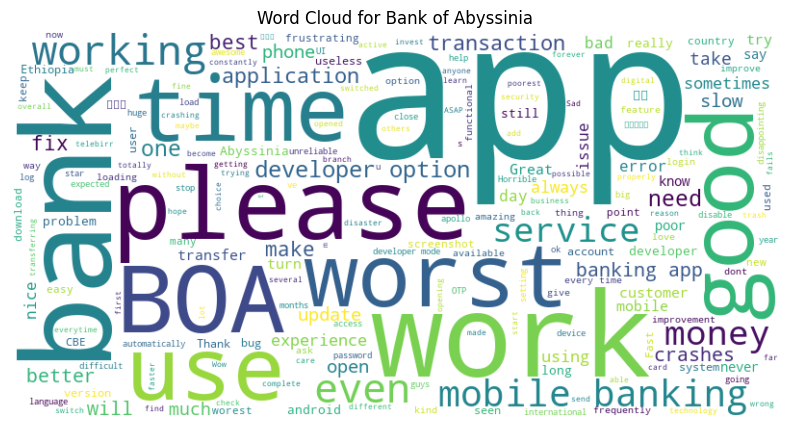

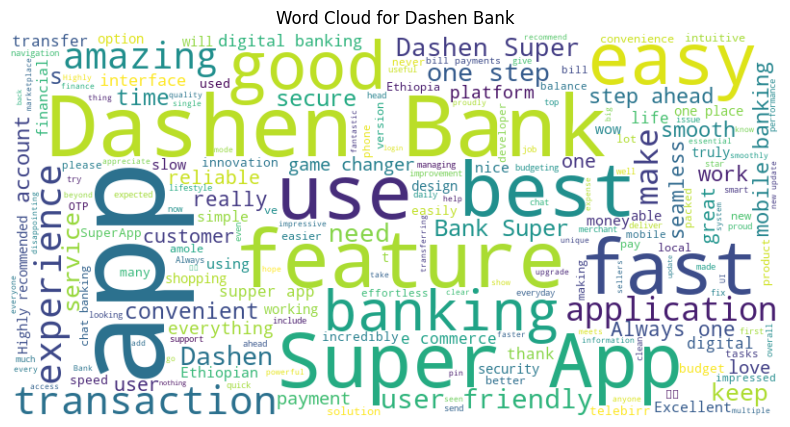

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for bank in df['bank'].unique():
    text = " ".join(df[df['bank'] == bank]['review'].dropna().values)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {bank}')
    plt.savefig(f'../outputs/plots/wordcloud_{bank.replace(" ", "_")}.png')


## Insights – Drivers and Pain Points
# CBE – Commercial Bank of Ethiopia
- Driver: Fast login and clean UI mentioned frequently in positive reviews.

- Pain Point: Crashes during money transfers and biometric login failure.

- Suggested Fix: Improve error handling during transaction flow.

# BOA – Bank of Abyssinia
- Driver: Decent navigation and responsive customer support when available.

- Pain Point: High volume of login errors, long load times.

- Suggested Fix: Optimize app performance and backend auth APIs.

# Dashen Bank
- Driver: Best UI among the three; many reviews mention attractive design and smooth flow.

- Pain Point: Occasional freezing and fingerprint authentication bugs.

- Suggested Fix: Add biometric fallback options and crash reporting.